# 분산도

자료가 대표치를 중심으로 얼마나 밀집 또는 분산되어 있는가를 나타내는 수치 

산포도가 큰 자료는 변동이 크다는 것을 의미하며 변동이 크다는 것은 통계적 추론 과정에서 불확실성과 위험이 크다는 것

산포도 사례 :  범위, 분산과 표준편차, 사분위편차, 변동계수 등

In [4]:
# 필요한 라이브러리 호출
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# 한글폰트 출력 가능 코드
from matplotlib import rc
rc('font', family='AppleGothic') # Mac Os
#rc('font', family='NanumGothic') # Windows Os
plt.rcParams['axes.unicode_minus'] = False

# 1. 기본 이해

## 1) Simple data 형성

In [5]:
# 데이터 랜덤하게 형성 (seed 부여)
np.random.seed(1)

# 12개월 동안 발생한 특정 지역 A의 범죄 건수라고 가정 (중심도 이해와 동일)
X = np.random.randint(1,20,12)
print(X)

[ 6 12 13  9 10 12  6 16  1 17  2 13]


## 2) 생성 데이터 시각화

C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing f

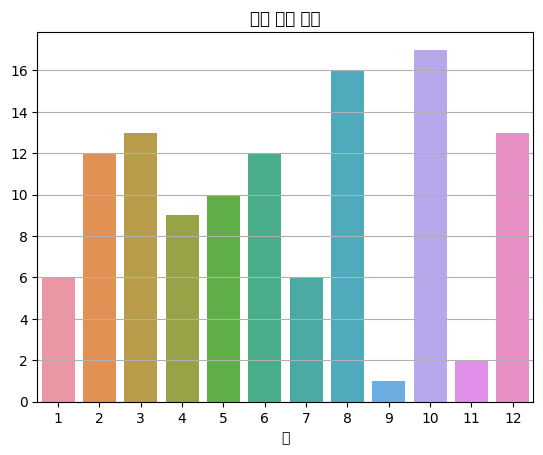

In [6]:
# 데이터 보기 (시각화로 각 원소별 개수를 출력)

sns.barplot(x= list(map(lambda x: x , range(1,13))), y=X)
plt.title('월별 판매 건수')
plt.xlabel('월')
plt.grid(axis='y')
plt.show()

## 3) 분산도 이해

#### (1) 범위

In [7]:
# 오름차순 정렬
tmp_data = sorted(X)
print(f'오름차순 정렬한 값 : {tmp_data}')

# 최솟값과 최댓값 출력
print(f'최소값 : {tmp_data[0]}')
print(f'최댓값 : {tmp_data[-1]}')

오름차순 정렬한 값 : [1, 2, 6, 6, 9, 10, 12, 12, 13, 13, 16, 17]
최소값 : 1
최댓값 : 17


In [8]:
# max, min 매서드 활용
print(f'특정 지역 A의 범죄 건수 데이터 : {X.tolist()}')

print(f'최솟값 : {min(X)}')
print(f'최댓값 : {max(X)}')

# 따라서 범위는 최댓값 - 최솟값으로 출력할 수 있음.
print(f'A 회사의 월별 판매 건수 데이터의 범위는 최소 {min(X)}에서 최대 {max(X)}로 {round(max(X) - min(X),2)}의 범위를 가지고 있습니다.')


특정 지역 A의 범죄 건수 데이터 : [6, 12, 13, 9, 10, 12, 6, 16, 1, 17, 2, 13]
최솟값 : 1
최댓값 : 17
A 회사의 월별 판매 건수 데이터의 범위는 최소 1에서 최대 17로 16의 범위를 가지고 있습니다.


### (2) 분산

In [9]:
n = len(X)
m = X.mean()

# 제곱을 해주는 매서드 pow를 활용하여 편차의 제곱 도출
# 편차 = 변량 - 평균
print(pow(X-m, 2))
resid = pow(X-m, 2)

# 제곱합을 한 후, 변량의 개수로 나눠주면 분산 도출
print(f'편차의 제곱합의 평균, 즉 분산은 {sum(resid)/n}입니다.')

[1.40625e+01 5.06250e+00 1.05625e+01 5.62500e-01 6.25000e-02 5.06250e+00
 1.40625e+01 3.90625e+01 7.65625e+01 5.25625e+01 6.00625e+01 1.05625e+01]
편차의 제곱합의 평균, 즉 분산은 24.020833333333332입니다.


In [10]:
# numpy를 이용한 분산값 도출
np.var(X)

24.020833333333332

### (3) 표쥰편차

In [11]:
# 표준편차는 분산의 제곱근입니다.
print(pow(np.var(X),1/2))

# numpy의 std 매서드를 활용한 표준편차 도출
print(np.std((X)))

4.90110531751087
4.90110531751087


### (4) 왜도

In [12]:
# 변수 설정
n = len(X)
m = X.mean()
std = np.std(X)

# 편차/표쥰편차 값에 3제곱 시행 
tmp_result = pow((X - m)/std, 3)
print(f'편차/표쥰편차의 3제곱 : {tmp_result.tolist()}')

# 3제곱 한 값을 더하고 데이터 개수만큼 나누면 왜도 도출
result = sum(tmp_result)/n
print(f'왜도 : {result}')

편차/표쥰편차의 3제곱 : [-0.44793159673025457, 0.09675322489373499, 0.29158687941225747, -0.003583452773842037, 0.00013272047310526058, 0.09675322489373499, -0.44793159673025457, 2.0737573922696972, -5.690390284388049, 3.236919618564201, -3.9538756142788194, 0.29158687941225747]
왜도 : -0.3713518837485193


### (5) 첨도

In [13]:
# 변수 설정
n = len(X)
m = X.mean()
std = np.std(X)

# 편차/표준편차의 4제곱 시행
tmp_result = pow(((X - m) / std), 4)
print(f'편차/표쥰편차의 4제곱 : {tmp_result.tolist()}')

# 4제곱 한 값을 더하고 데이터 개수만큼 나누고 -3을 하면 첨도 도출
result = sum(tmp_result)/n - 3
print(f'첨도 : {result}')

편차/표쥰편차의 4제곱 : [0.34272748266334907, 0.04441748175317004, 0.19335584458958832, 0.0005483639722613585, 6.7699255834735595e-06, 0.04441748175317004, 0.34272748266334907, 2.6445021810443605, 10.159119578700013, 4.788239736604764, 6.252168444775088, 0.19335584458958832]
첨도 : -0.9162011089138096


In [14]:
# 라이브러리 import로 구한 kurtosis
from scipy.stats import kurtosis

kurtosis(X)

-0.9162011089138105

# 2. 삼성전자 데이터

## 1) 데이터 불러오기

In [30]:
import yfinance as yf
import numpy as np
import pandas as pd

# 삼성전자 일별 데이터 가져오기
ticker = "005930.KS"
samsung = yf.download(ticker, start="2023-01-01", end="2023-12-31")



[*********************100%***********************]  1 of 1 completed


In [29]:
samsung

Price,Adj Close,Close,High,Low,Open,Volume,Daily Return
Ticker,005930.KS,005930.KS,005930.KS,005930.KS,005930.KS,005930.KS,
Date,,,,,,,
2023-01-02 00:00:00+00:00,53576.570312,55500.0,56100.0,55200.0,55500.0,10031448,NaN
2023-01-03 00:00:00+00:00,53480.046875,55400.0,56000.0,54500.0,55400.0,13547030,-0.001802
2023-01-04 00:00:00+00:00,55796.867188,57800.0,58000.0,55600.0,55700.0,20188071,0.043321
2023-01-05 00:00:00+00:00,56183.007812,58200.0,58800.0,57600.0,58200.0,15682826,0.006920
2023-01-06 00:00:00+00:00,56955.281250,59000.0,59400.0,57900.0,58300.0,17334989,0.013746
...,...,...,...,...,...,...,...
2023-12-21 00:00:00+00:00,73566.117188,75000.0,75000.0,74300.0,74600.0,13478766,0.002674
2023-12-22 00:00:00+00:00,74448.914062,75900.0,76300.0,75400.0,75800.0,14515608,0.012000


In [36]:
# 종가 데이터
samsung['Daily Return'] = samsung['Close'].pct_change()  # 종가 수익률 계산

# 수익률 평균과 분산 계산
mean_return = samsung['Daily Return'].mean()  # 평균
variance_return = samsung['Daily Return'].var()  # 분산

# 결과 출력
print(f"종가 수익률 평균: {mean_return:.6f}")
print(f"종가 수익률 분산: {variance_return:.6f}")

# 수익률 데이터와 통계 출력
print(samsung[['Close', 'Daily Return']].head())


종가 수익률 평균: nan
종가 수익률 분산: nan
Price                         Close Daily Return
Ticker                    005930.KS             
Date                                            
2023-01-02 00:00:00+00:00   55500.0          NaN
2023-01-03 00:00:00+00:00   55400.0          NaN
2023-01-04 00:00:00+00:00   57800.0          NaN
2023-01-05 00:00:00+00:00   58200.0          NaN
2023-01-06 00:00:00+00:00   59000.0          NaN


In [39]:
std_dev_return = samsung['Daily Return'].std()
print(f"종가 수익률 표준편차: {std_dev_return:.6f}")


종가 수익률 표준편차: 0.013281


In [2]:
import pandas as pd
import numpy as np
import yfinance as yf

# 삼성전자 티커 심볼
ticker = '005930.KS'

# 데이터 가져오기 (시작일과 종료일 설정)
start_date = '2023-01-01'
end_date = '2024-11-19'  # 오늘 날짜로 설정

# 주가 데이터 다운로드
df = yf.download(ticker, start=start_date, end=end_date)

# 종가(Close) 열을 사용하여 수익률 계산
df['Return'] = df['Close'].pct_change()

# 결측값 제거 (첫 번째 수익률은 NaN이므로 제거)
df = df.dropna()

# 수익률의 분산 계산
variance = np.var(df['Return'])

print(f"삼성전자 주식 수익률의 분산: {variance}")


[*********************100%***********************]  1 of 1 completed

삼성전자 주식 수익률의 분산: 0.0002921171957720835


In [3]:
import pandas as pd
import numpy as np

# 예시로 주식 가격 데이터 생성
# 실제로는 Yahoo Finance나 다른 API에서 주가 데이터를 가져올 수 있습니다.
data = {
    'Date': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05'],
    'Price': [100, 102, 101, 105, 107]
}

# 데이터프레임 생성
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])

# 주가 수익률 계산
# 수익률 = (오늘 가격 - 어제 가격) / 어제 가격
df['Return'] = df['Price'].pct_change()

# 결측값 제거 (첫 번째 수익률은 NaN이므로 제거)
df = df.dropna()

# 일별 수익률의 분산 계산
daily_variance = np.var(df['Return'])

# 연간 수익률의 분산 계산 (일별 수익률을 기준으로)
annual_variance = daily_variance * 252

print(f"주식 일별 수익률의 분산: {daily_variance}")
print(f"주식 연간 수익률의 분산: {annual_variance}")


주식 일별 수익률의 분산: 0.00031060058745968876
주식 연간 수익률의 분산: 0.07827134803984157


In [41]:
print(samsung['Daily Return'].describe())


count    244.000000
mean       0.001509
std        0.013281
min       -0.030016
25%       -0.006945
50%        0.000688
75%        0.007937
max        0.061286
Name: Daily Return, dtype: float64


[*********************100%***********************]  1 of 1 completed


['Daily Return']


[*********************100%***********************]  1 of 1 completed


['Daily Return']


[*********************100%***********************]  1 of 1 completed


['Daily Return']


[*********************100%***********************]  1 of 1 completed


['Daily Return']


[*********************100%***********************]  1 of 1 completed
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.


['Daily Return']


findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Fon

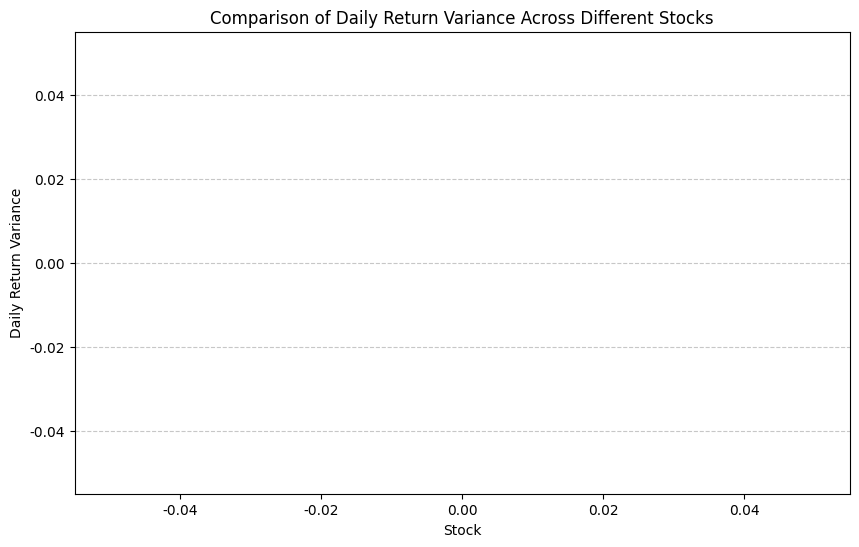

In [43]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 종목 리스트 (예: 애플, 마이크로소프트, 구글, 아마존, 테슬라)
stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

# 각 종목의 데이터를 저장할 딕셔너리
stock_data = {}

# 각 종목의 주식 데이터 다운로드 및 수익률 계산
def get_stock_variance(ticker):
    data = yf.download(ticker, start='2023-01-01', end='2023-12-31')
    if 'Close' not in data.columns:
        raise KeyError(f"'Close' column not found for ticker {ticker}. Data might be missing.")
    data['Daily Return'] = data['Close'].pct_change()  # 일별 수익률 계산
    data = data.dropna(subset=['Daily Return'])  # 결측치 제거
    variance = data['Daily Return'].var()  # 분산 계산
    return variance

# 각 주식의 수익률 분산 계산 및 저장
variances = {}
for stock in stocks:
    try:
        variance = get_stock_variance(stock)
        variances[stock] = variance
    except KeyError as e:
        print(e)

# 분산 값을 데이터프레임으로 변환
variance_df = pd.DataFrame(list(variances.items()), columns=['Stock', 'Variance'])

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(variance_df['Stock'], variance_df['Variance'], color='skyblue')
plt.xlabel('Stock')
plt.ylabel('Daily Return Variance')
plt.title('Comparison of Daily Return Variance Across Different Stocks')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
